In [33]:
%matplotlib inline

from tf_unet import unet, util, image_util
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [34]:
# Change this
path_to_segmentation = "/home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/"

print ("Training files found at: " + path_to_segmentation + "code/Train/*.tif")

Training files found at: /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Train/*.tif


In [35]:
# tf_unet.image_util.ImageDataProvider(search_path, a_min=None, a_max=None, data_suffix=u'.tif', mask_suffix=u'_mask.tif', shuffle_data=True, n_class=2)
#preparing data loading
#Train forlder should have corresponding images named x.TIF and x_mask.tif
data_provider = image_util.ImageDataProvider( path_to_segmentation + "code/Train/*.tif")

Number of files used: 1600


In [36]:
#setup & training
net = unet.Unet(layers=3, features_root=8, channels=3, n_class=2)
trainer = unet.Trainer(net)
output_path = path_to_segmentation +  "code/Trained_Models/"
path = trainer.train(data_provider, output_path, training_iters=10, epochs=10, restore = True)
print (path)

2018-07-20 19:34:20,075 Layers 3, features 8, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt


2018-07-20 19:34:21,690 Restoring parameters from /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt
2018-07-20 19:34:21,794 Model restored from file: /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt
2018-07-20 19:34:23,373 Verification error= 27.8%, loss= 0.6025
2018-07-20 19:34:23,810 Start optimization
2018-07-20 19:34:24,990 Iter 0, Minibatch Loss= 0.4242, Training Accuracy= 0.9845, Minibatch error= 1.5%
2018-07-20 19:34:26,012 Iter 1, Minibatch Loss= 0.6509, Training Accuracy= 0.6450, Minibatch error= 35.5%
2018-07-20 19:34:27,045 Iter 2, Minibatch Loss= 0.6138, Training Accuracy= 0.6995, Minibatch error= 30.0%
2018-07-20 19:34:28,106 Iter 3, Minibatch Loss= 0.5535, Training Accuracy= 0.7836, Minibatch error= 21.6%
2018-07-20 19:34:29,121 Iter 4, Minibatch Loss= 0.4822, Training Accuracy= 0.8711, Minibatch error= 12.9%
2018-07-20 19:34:30,144 Iter 5, Minibatch Lo

2018-07-20 19:35:44,745 Iter 65, Minibatch Loss= 0.5050, Training Accuracy= 0.8162, Minibatch error= 18.4%
2018-07-20 19:35:45,775 Iter 66, Minibatch Loss= 0.6031, Training Accuracy= 0.7068, Minibatch error= 29.3%
2018-07-20 19:35:46,927 Iter 67, Minibatch Loss= 0.5503, Training Accuracy= 0.7645, Minibatch error= 23.6%
2018-07-20 19:35:48,107 Iter 68, Minibatch Loss= 0.3699, Training Accuracy= 0.9490, Minibatch error= 5.1%
2018-07-20 19:35:49,246 Iter 69, Minibatch Loss= 0.7223, Training Accuracy= 0.5829, Minibatch error= 41.7%
2018-07-20 19:35:49,247 Epoch 6, Average loss: 0.6357, learning rate: 0.1327
2018-07-20 19:35:50,676 Verification error= 27.8%, loss= 0.5895
2018-07-20 19:35:52,428 Iter 70, Minibatch Loss= 0.8523, Training Accuracy= 0.4334, Minibatch error= 56.7%
2018-07-20 19:35:53,529 Iter 71, Minibatch Loss= 0.6261, Training Accuracy= 0.6812, Minibatch error= 31.9%
2018-07-20 19:35:54,584 Iter 72, Minibatch Loss= 0.5500, Training Accuracy= 0.7671, Minibatch error= 23.3%
2018

/home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt


### To load Model, run from here

In [37]:
img_filelist = glob.glob(path_to_segmentation + "code/Test/Input_Images/*.tif");
label_filelist = glob.glob(path_to_segmentation + "code/Test/Masks/*.tif");

img_filelist.sort()
label_filelist.sort()

test_size = 10 # Number of test images

img_filelist = img_filelist[0:10]
label_filelist = label_filelist[0:10]

#print(img_filelist)
#print(label_filelist)
data = np.array([np.array(Image.open(fname)) for fname in img_filelist])
label = np.array([data_provider._process_labels(np.array(Image.open(fname))) for fname in label_filelist])

print(data.shape)
print(label.shape)

(10, 288, 384, 3)
(10, 288, 384, 2)


In [39]:
output_path = path_to_segmentation +  "code/Trained_Models/"
net = unet.Unet(layers=3, features_root=8, channels=3, n_class=2)
trainer = unet.Trainer(net)
path = trainer.train(data_provider, output_path, training_iters=10, epochs=1, restore = True)

prediction = net.predict(path, data)
print('Shape of Prediction')
print(prediction.shape)
unet.error_rate(prediction, util.crop_to_shape(label, prediction.shape))

2018-07-20 19:36:30,221 Layers 3, features 8, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt


2018-07-20 19:36:31,963 Restoring parameters from /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt
2018-07-20 19:36:32,089 Model restored from file: /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt
2018-07-20 19:36:33,937 Verification error= 15.4%, loss= 0.5013
2018-07-20 19:36:34,509 Start optimization
2018-07-20 19:36:35,734 Iter 0, Minibatch Loss= 0.4186, Training Accuracy= 0.9545, Minibatch error= 4.6%
2018-07-20 19:36:36,784 Iter 1, Minibatch Loss= 0.5013, Training Accuracy= 0.8366, Minibatch error= 16.3%
2018-07-20 19:36:37,821 Iter 2, Minibatch Loss= 0.7146, Training Accuracy= 0.5679, Minibatch error= 43.2%
2018-07-20 19:36:38,863 Iter 3, Minibatch Loss= 0.4270, Training Accuracy= 0.9285, Minibatch error= 7.1%
2018-07-20 19:36:39,916 Iter 4, Minibatch Loss= 0.8034, Training Accuracy= 0.4490, Minibatch error= 55.1%
2018-07-20 19:36:40,956 Iter 5, Minibatch Los

INFO:tensorflow:Restoring parameters from /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt


2018-07-20 19:36:47,268 Restoring parameters from /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt
2018-07-20 19:36:47,385 Model restored from file: /home/asavari/Desktop/AI and CV Assignments for Github/Melanoma-Segmentation-2/code/Trained_Models/model.cpkt


Shape of Prediction
(10, 248, 344, 2)


38.95606714178545

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: an index can only have a single Ellipsis (`...`); replace all but one with slices (`:`).
  This is separate from the ipykernel package so we can avoid doing imports until


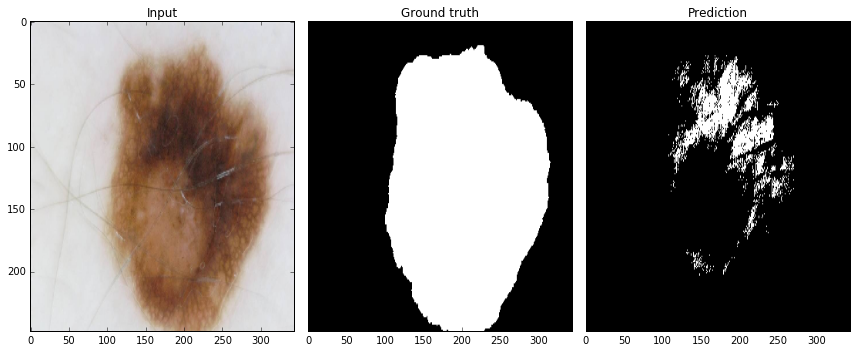

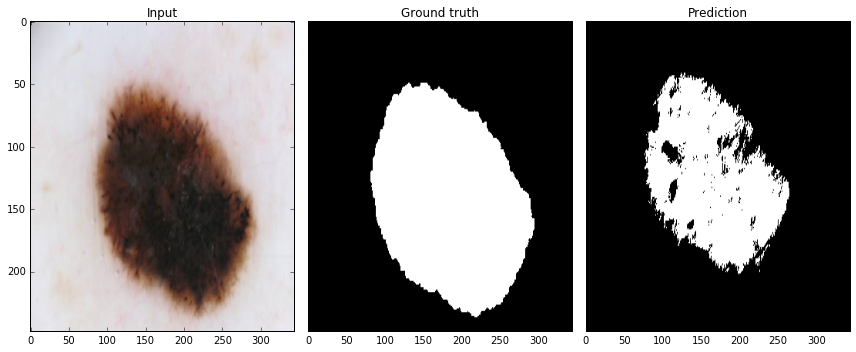

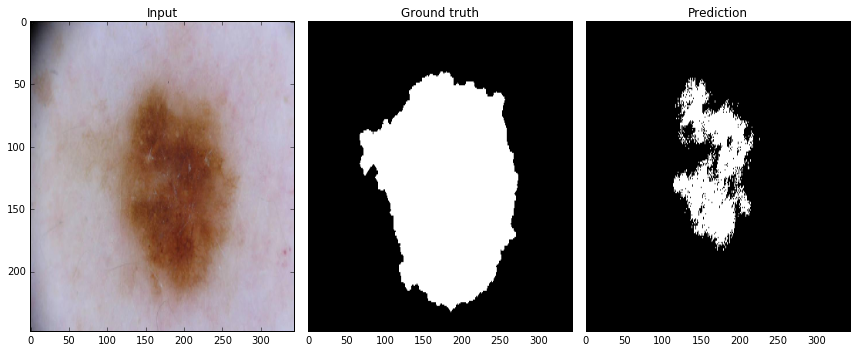

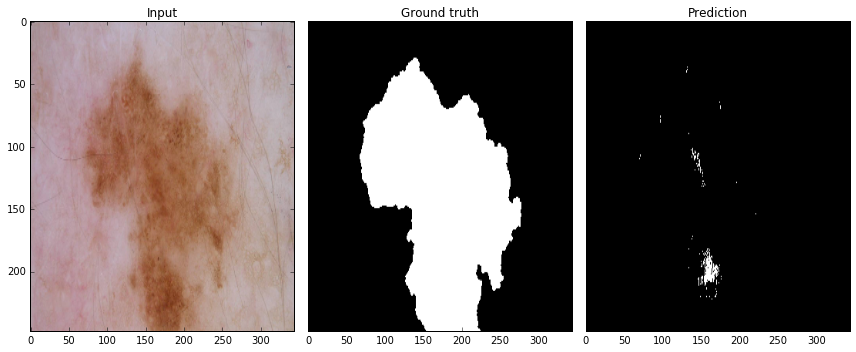

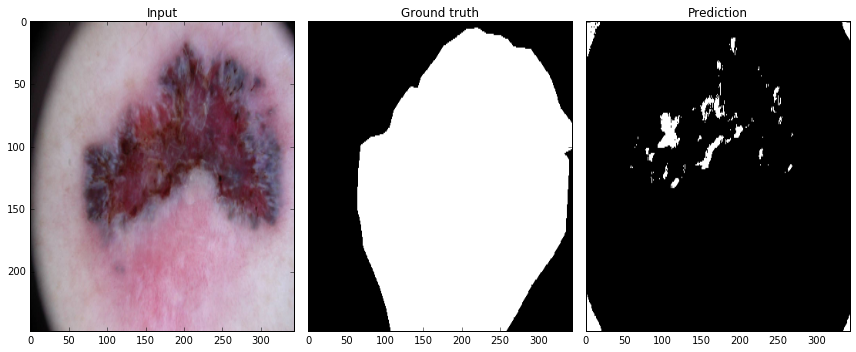

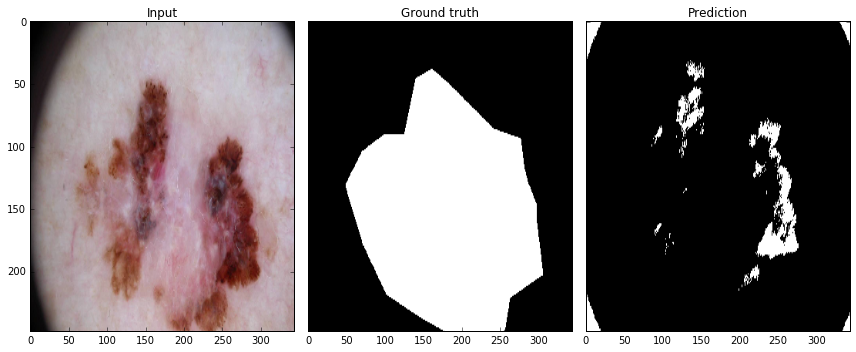

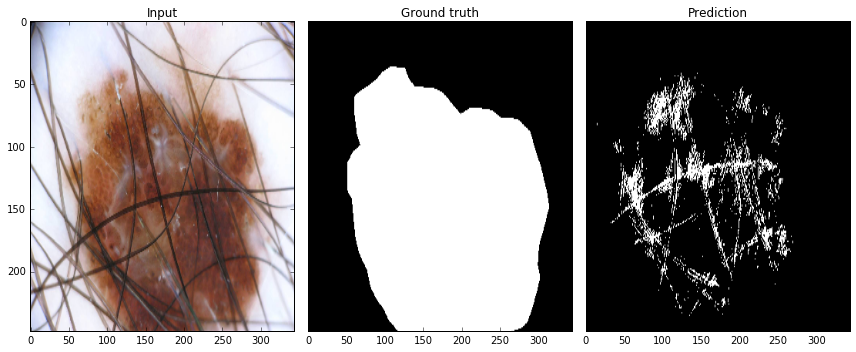

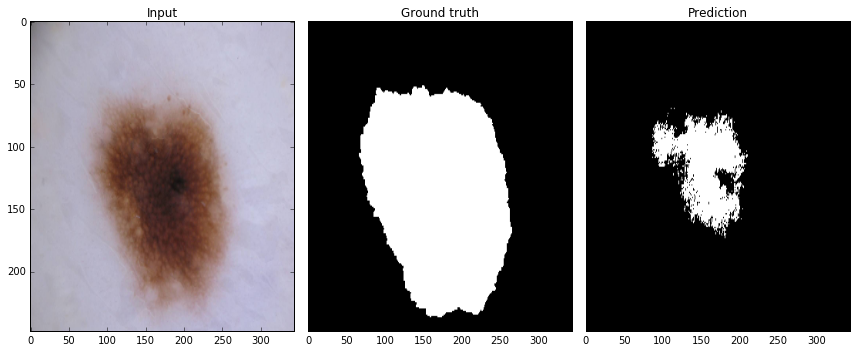

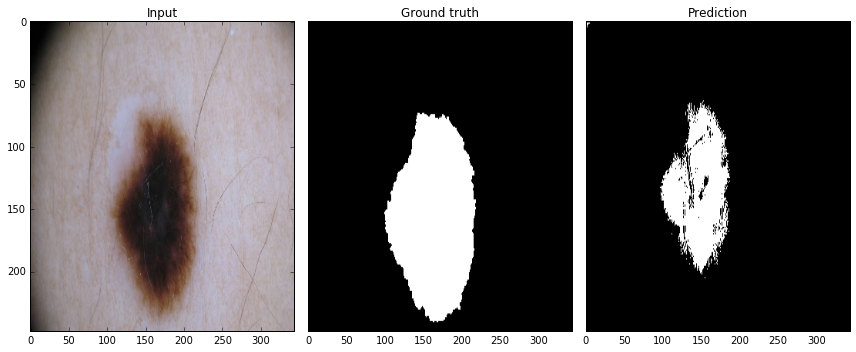

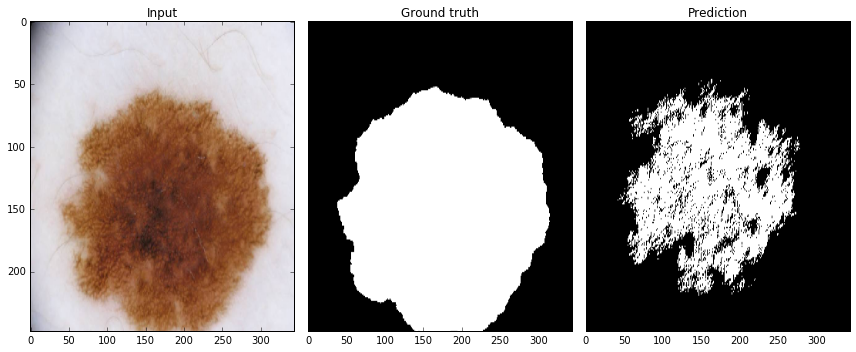

In [43]:
for p in range(0,prediction.shape[0]):
    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
    ax[0].imshow(data[p,...,...], aspect="auto")
    ax[1].imshow(label[p,...,1], aspect="auto",cmap='gray')
    mask = prediction[p,...,1]  > 0.2
    ax[2].imshow(mask, aspect="auto",cmap='gray')
    ax[0].set_title("Input")
    ax[1].set_title("Ground truth")
    ax[2].set_title("Prediction")
    fig.tight_layout()
    fig.savefig(path_to_segmentation + "code/Predictions_Visualized/" + str(p) + ".png")
    #fig.show()